# **Part I: Applying Image Processing Filters For Image**
# **Cartoonifying**

In [ ]:
import cv2
from IPython.display import Image, display
import numpy as np

def saveShowImg(img, name):
    cv2.imwrite("/content/" + name, img)
    display(Image(filename="/content/" + name))

In [ ]:
def convert_to_grayscale(input_image):
    # Convert the input image to grayscale using the cv2.COLOR_BGR2GRAY conversion flag.
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    saveShowImg(grayscale_image, "grayscale_image.png")
    return grayscale_image

In [ ]:
def reduce_noise(grayscale_image):
    # Apply median blur to reduce noise in the grayscale image using a kernel size of 5.
    noise_reduced_image = cv2.medianBlur(grayscale_image, 5)
    saveShowImg(noise_reduced_image, "noise_reduced_image.png")
    return noise_reduced_image

In [ ]:
def laplacian_filter(image):
    # Apply Laplacian edge detection to the image using a kernel size of 5.
    laplacian = cv2.Laplacian(image, -1, ksize=5)
    saveShowImg(laplacian, "laplacian.png")
    return laplacian

In [ ]:
def edge_detection(laplacian):
    # Compute the absolute values of the Laplacian image and convert it to 8-bit unsigned integer.
    laplacian_abs_uint8 = np.uint8(np.absolute(laplacian))

    # Apply thresholding to the absolute Laplacian image.
    _, edge_mask = cv2.threshold(laplacian_abs_uint8, 105, 255, cv2.THRESH_BINARY_INV)
    saveShowImg(edge_mask, "edge_mask.png")
    return edge_mask

In [ ]:
def bilateral_filter(input_image):
    # Apply bilateral filtering to create a cartoon effect.
    cartoon_image = cv2.bilateralFilter(input_image, 9, 10, 15)
    saveShowImg(cartoon_image, "cartoon_image.png")
    return cartoon_image

In [ ]:
def cartoonize_image(cartoon_image, edge_mask):
    # Overlay edge mask onto cartoon image using bitwise AND operation.
    cartoonized_image = cv2.bitwise_and(cartoon_image, cartoon_image, mask=edge_mask)
    saveShowImg(cartoonized_image, "cartoonized_image.png")

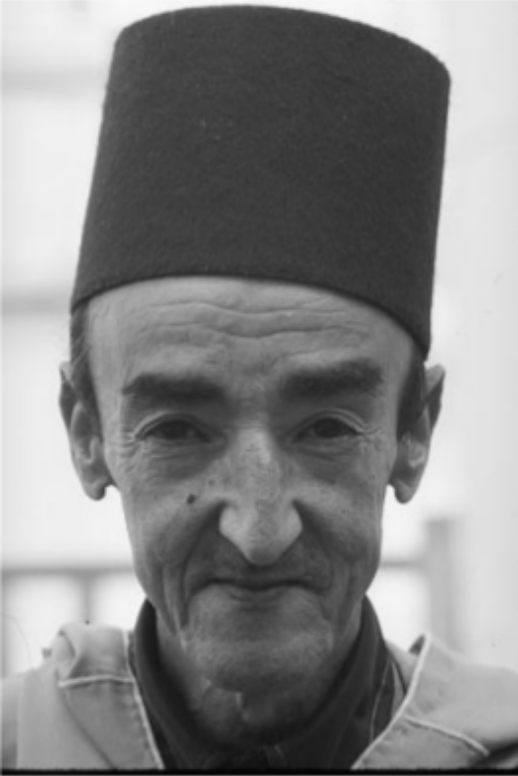

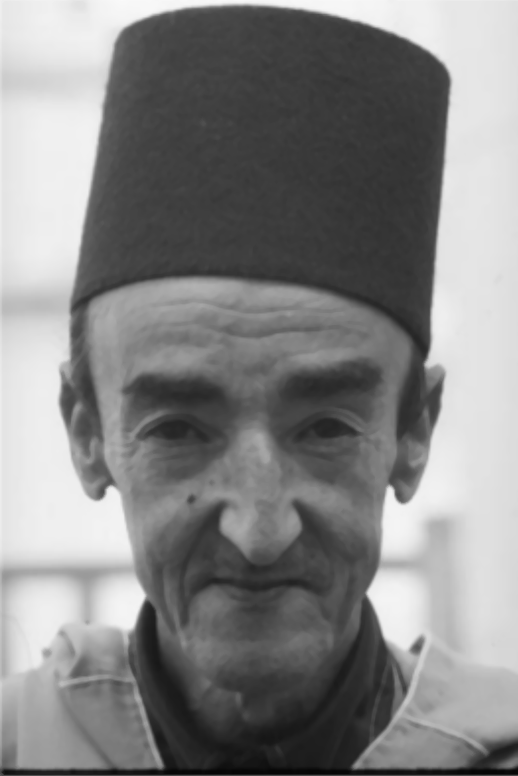

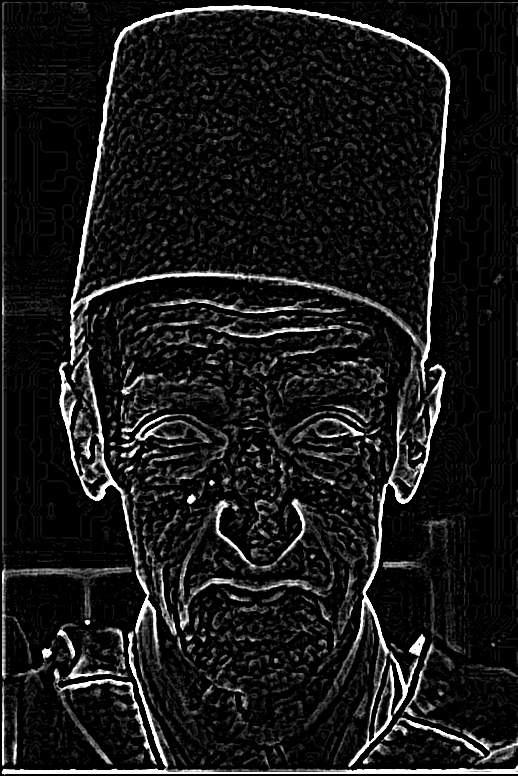

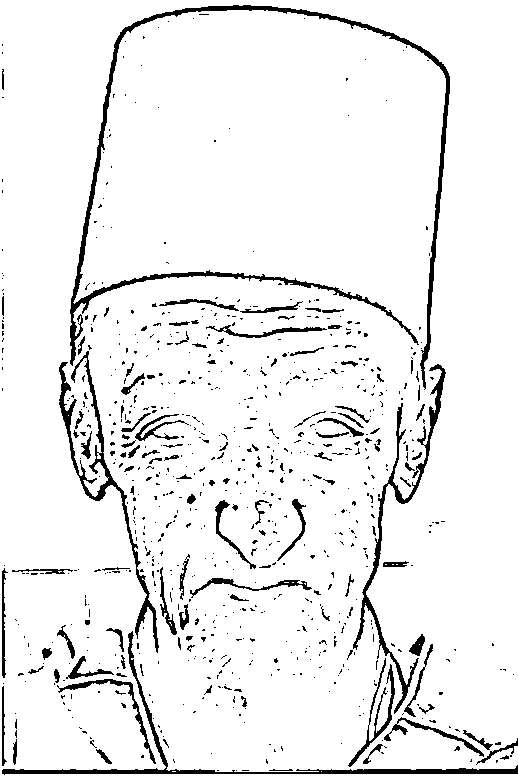

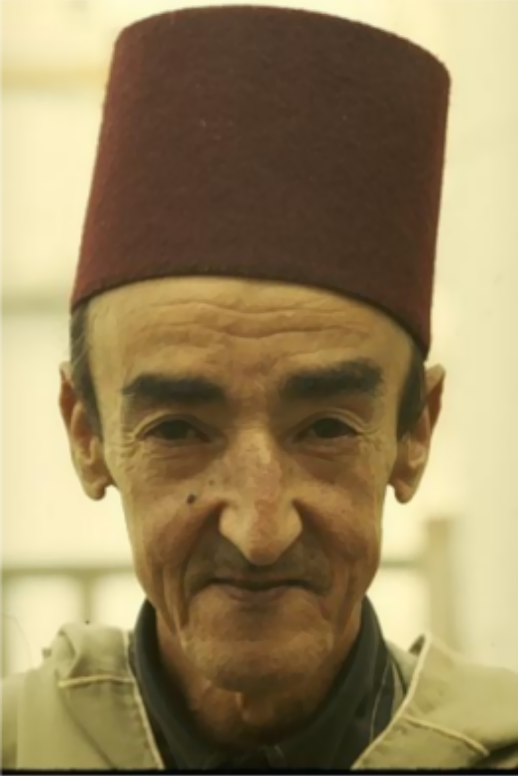

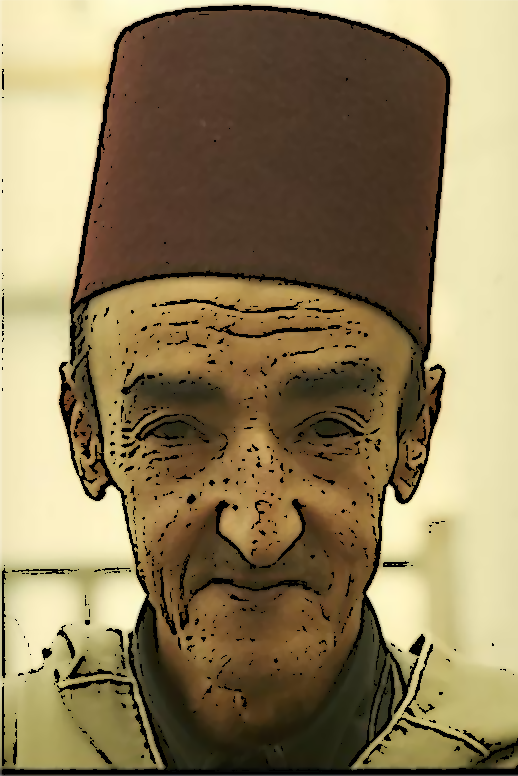

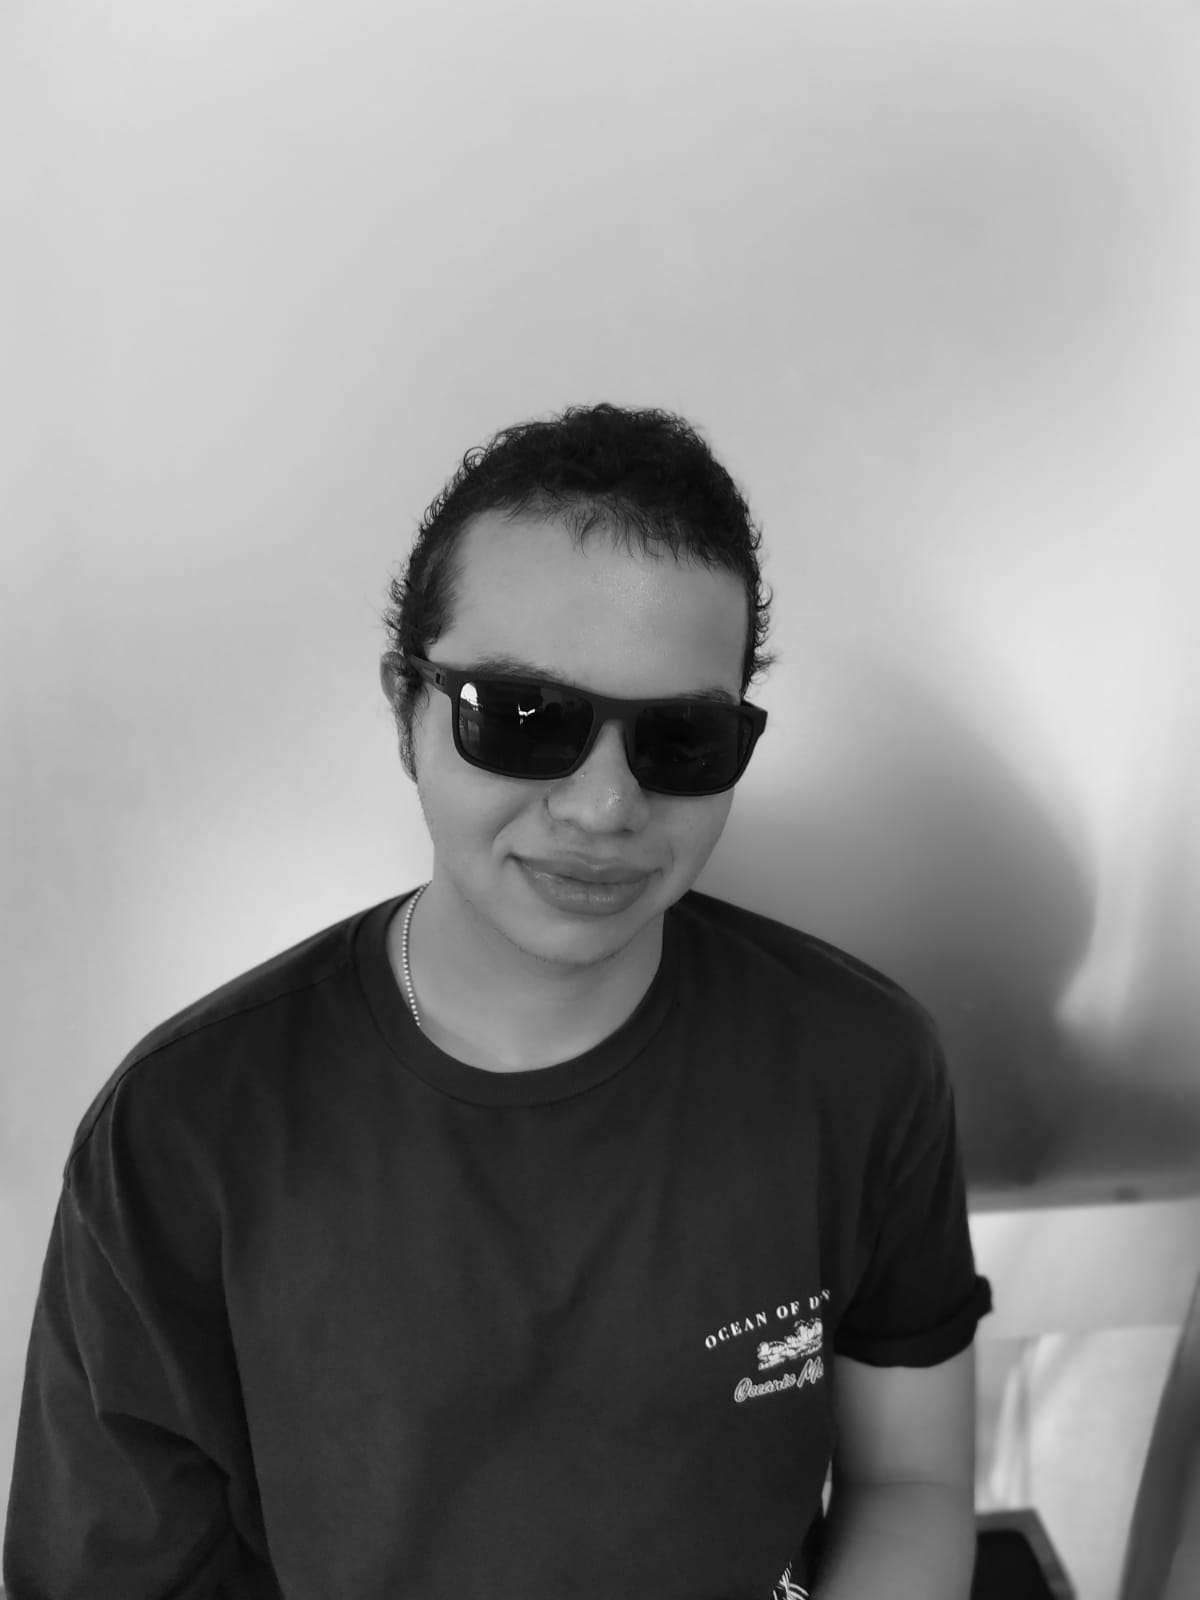

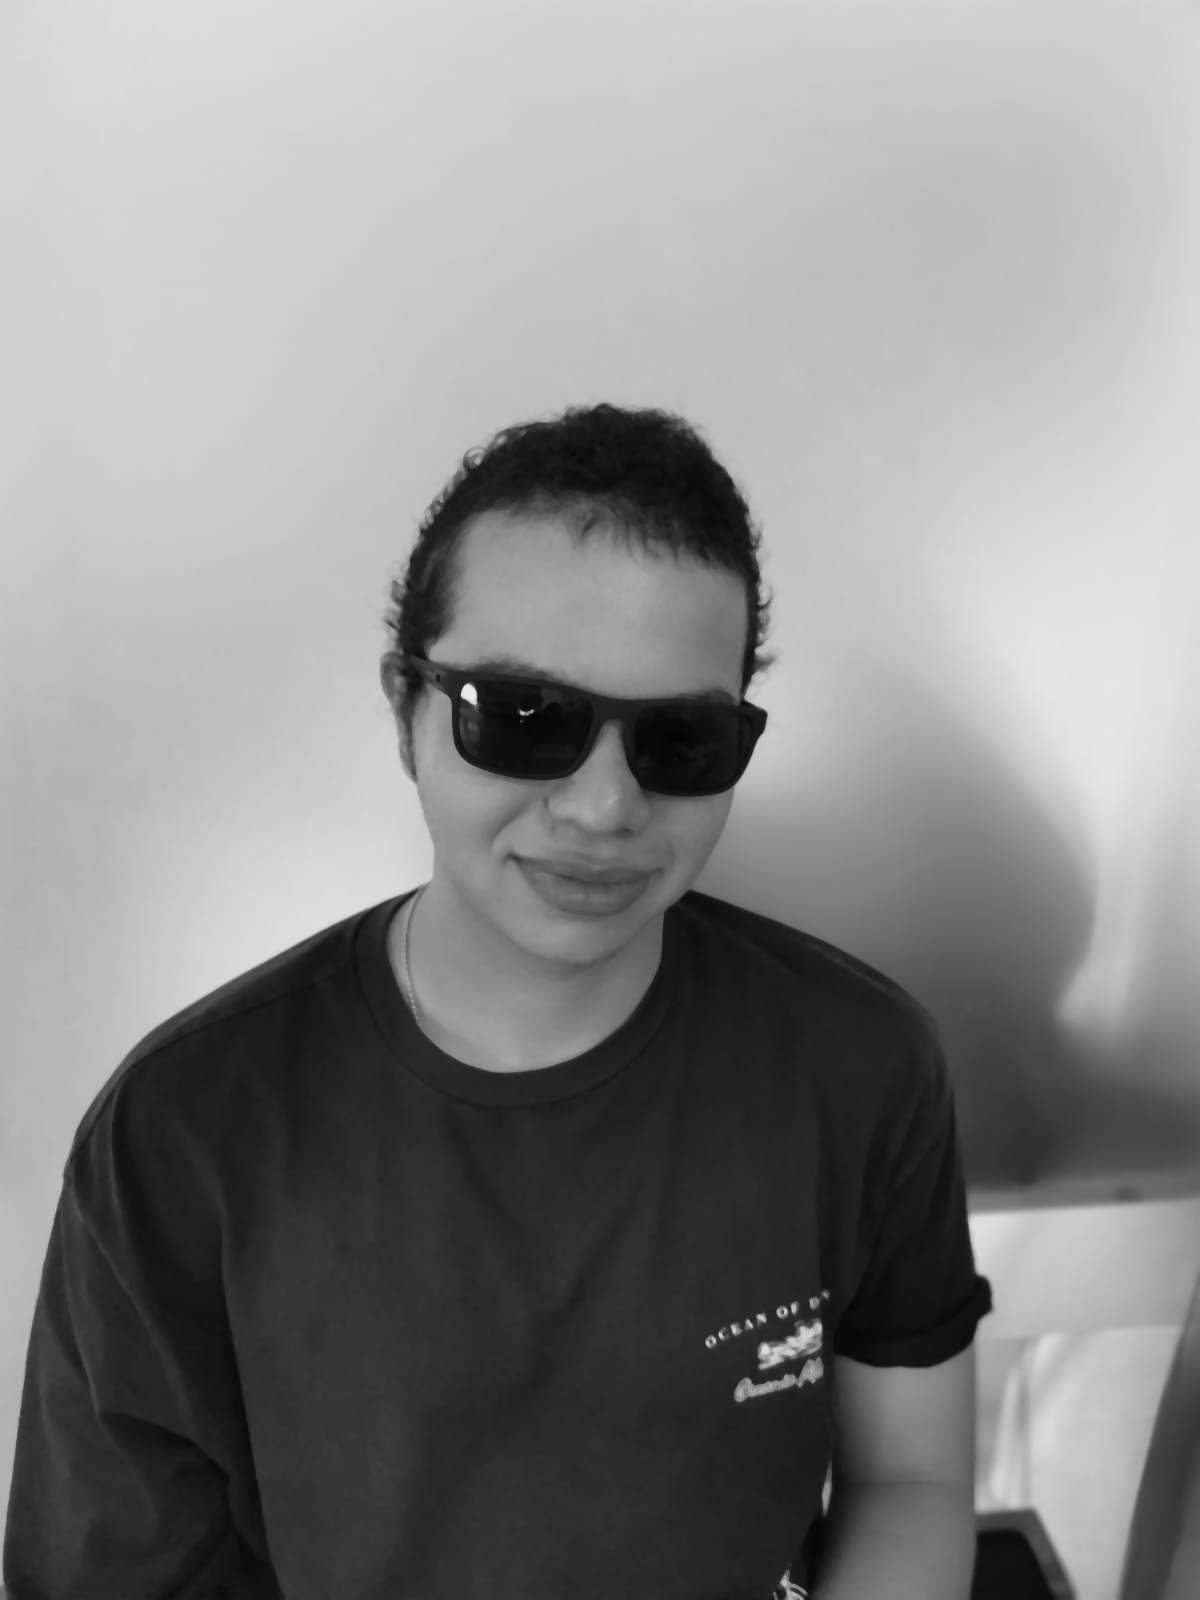

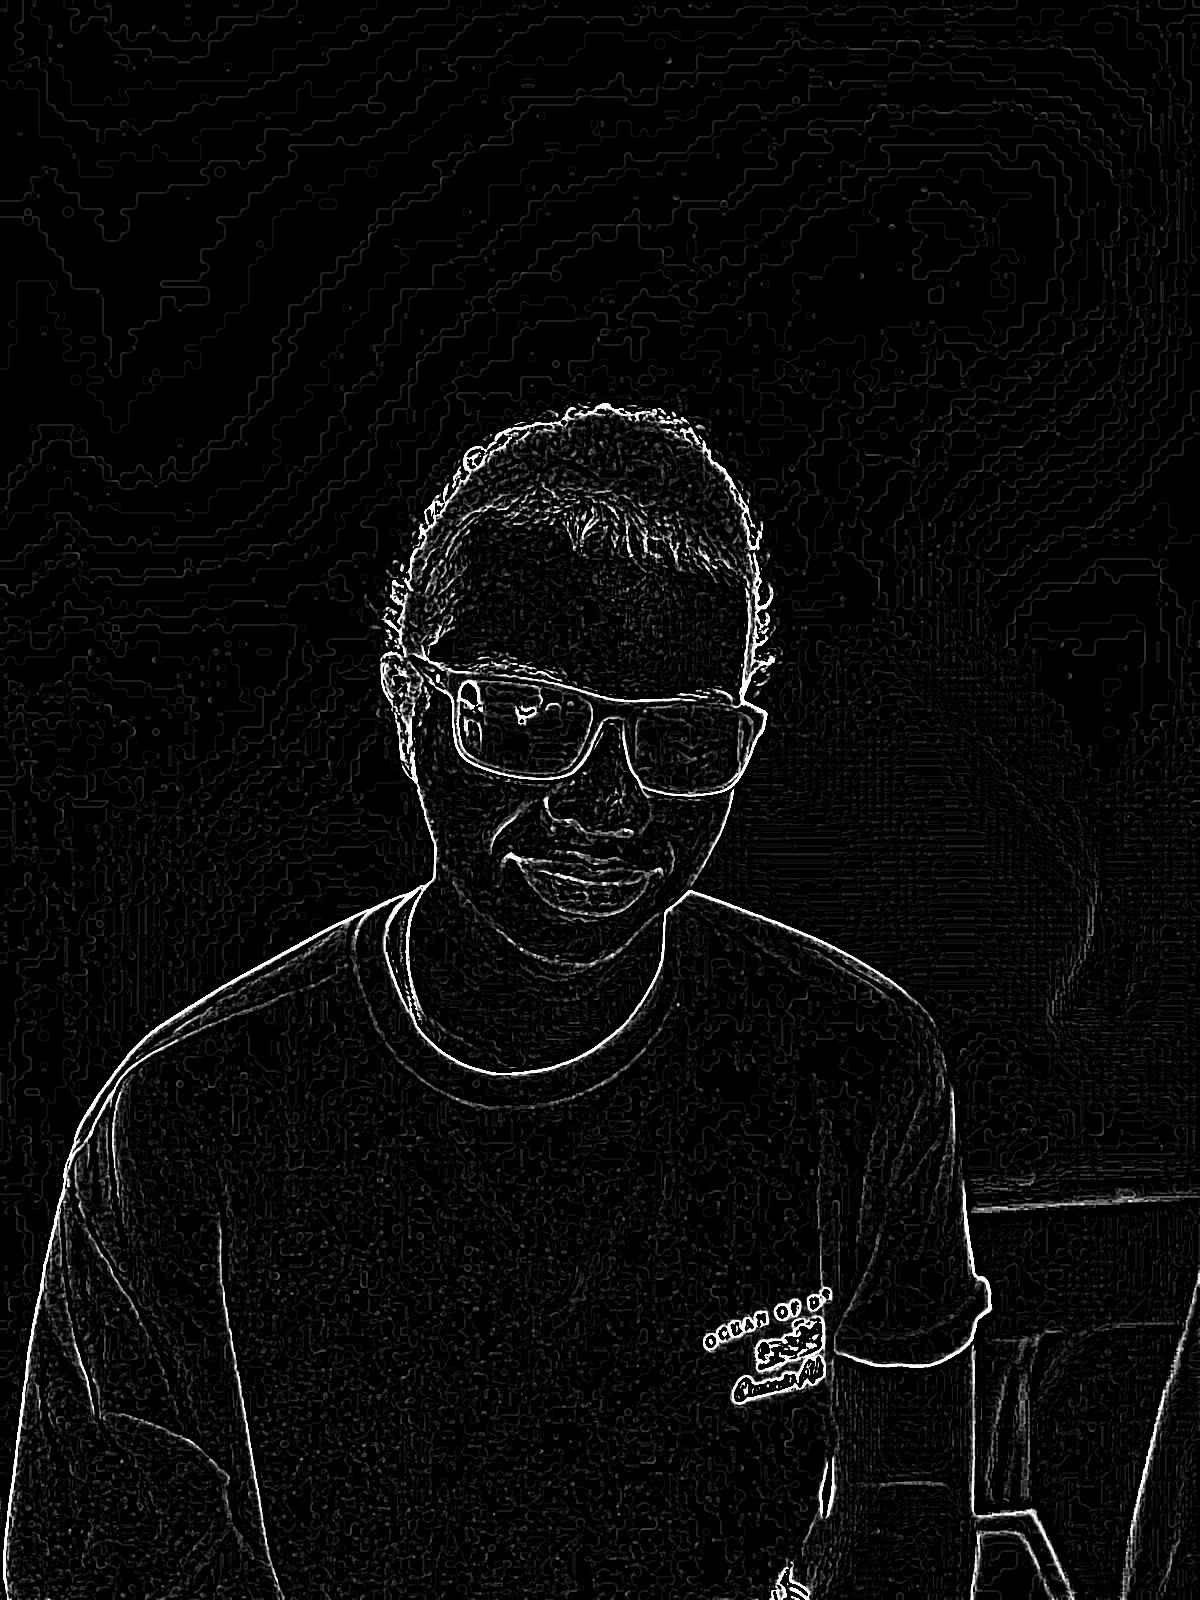

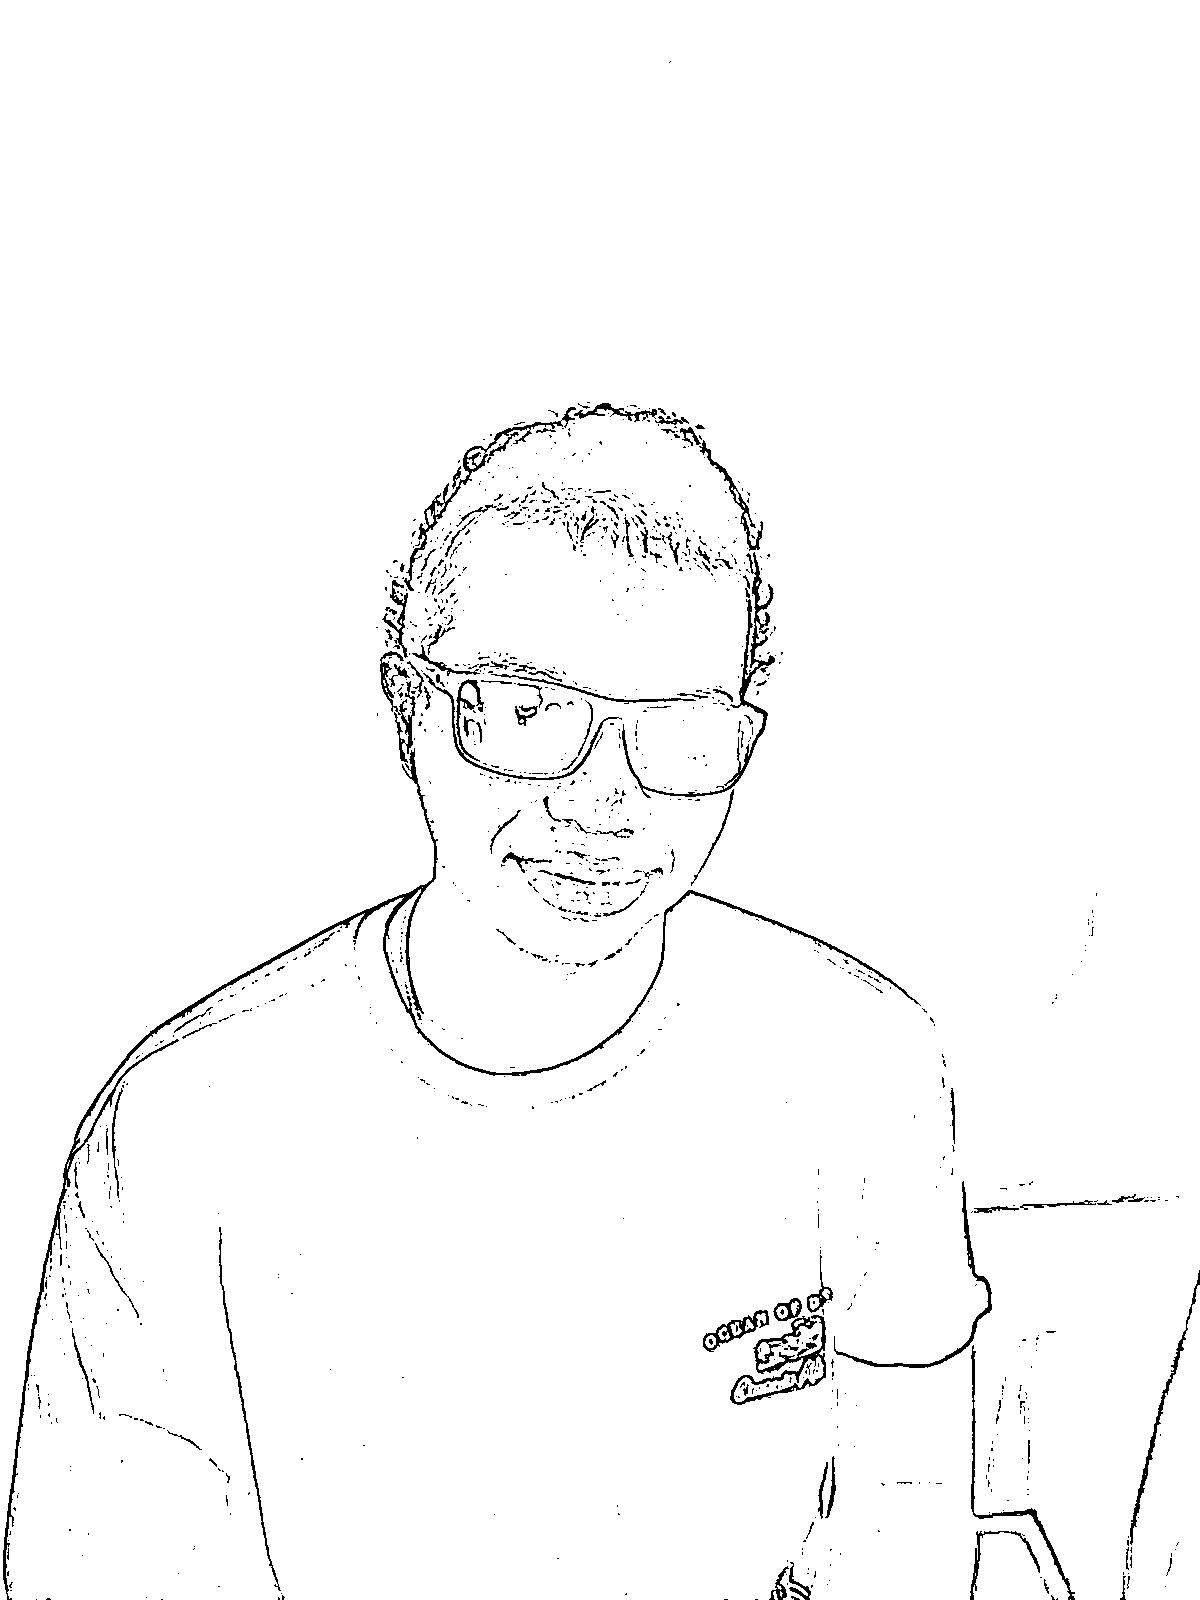

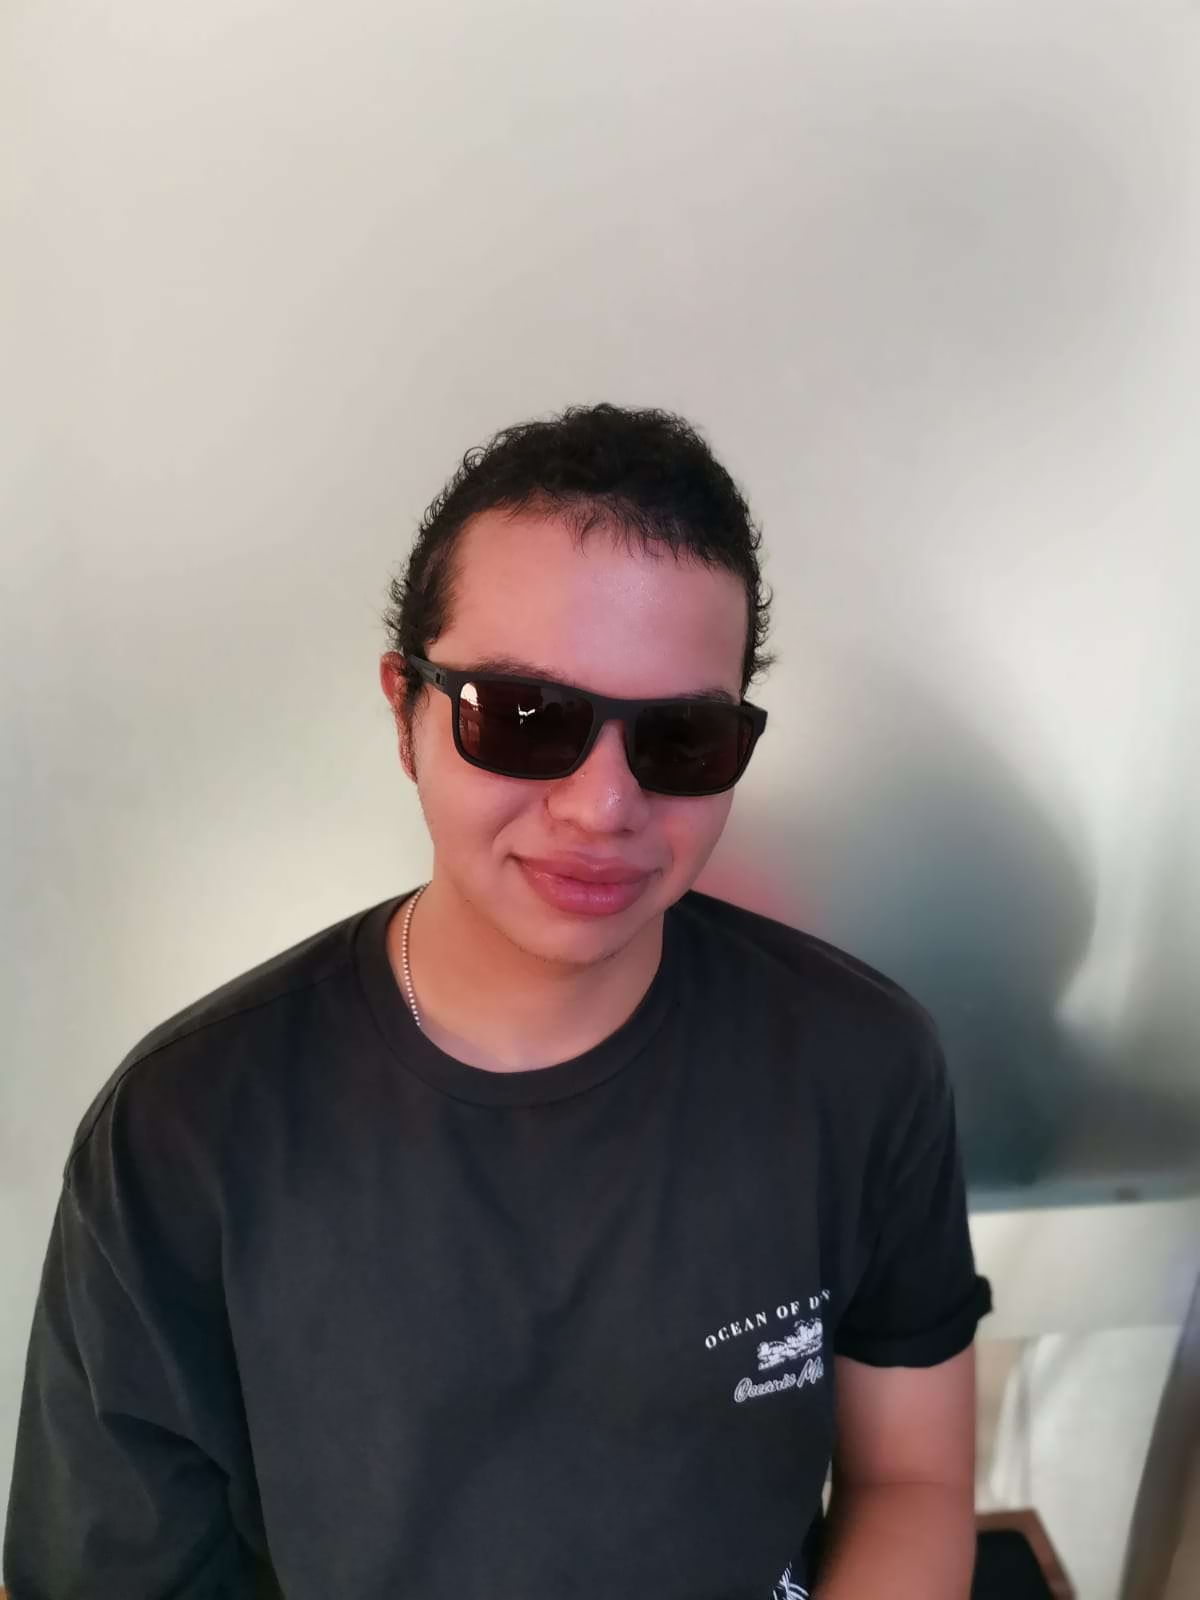

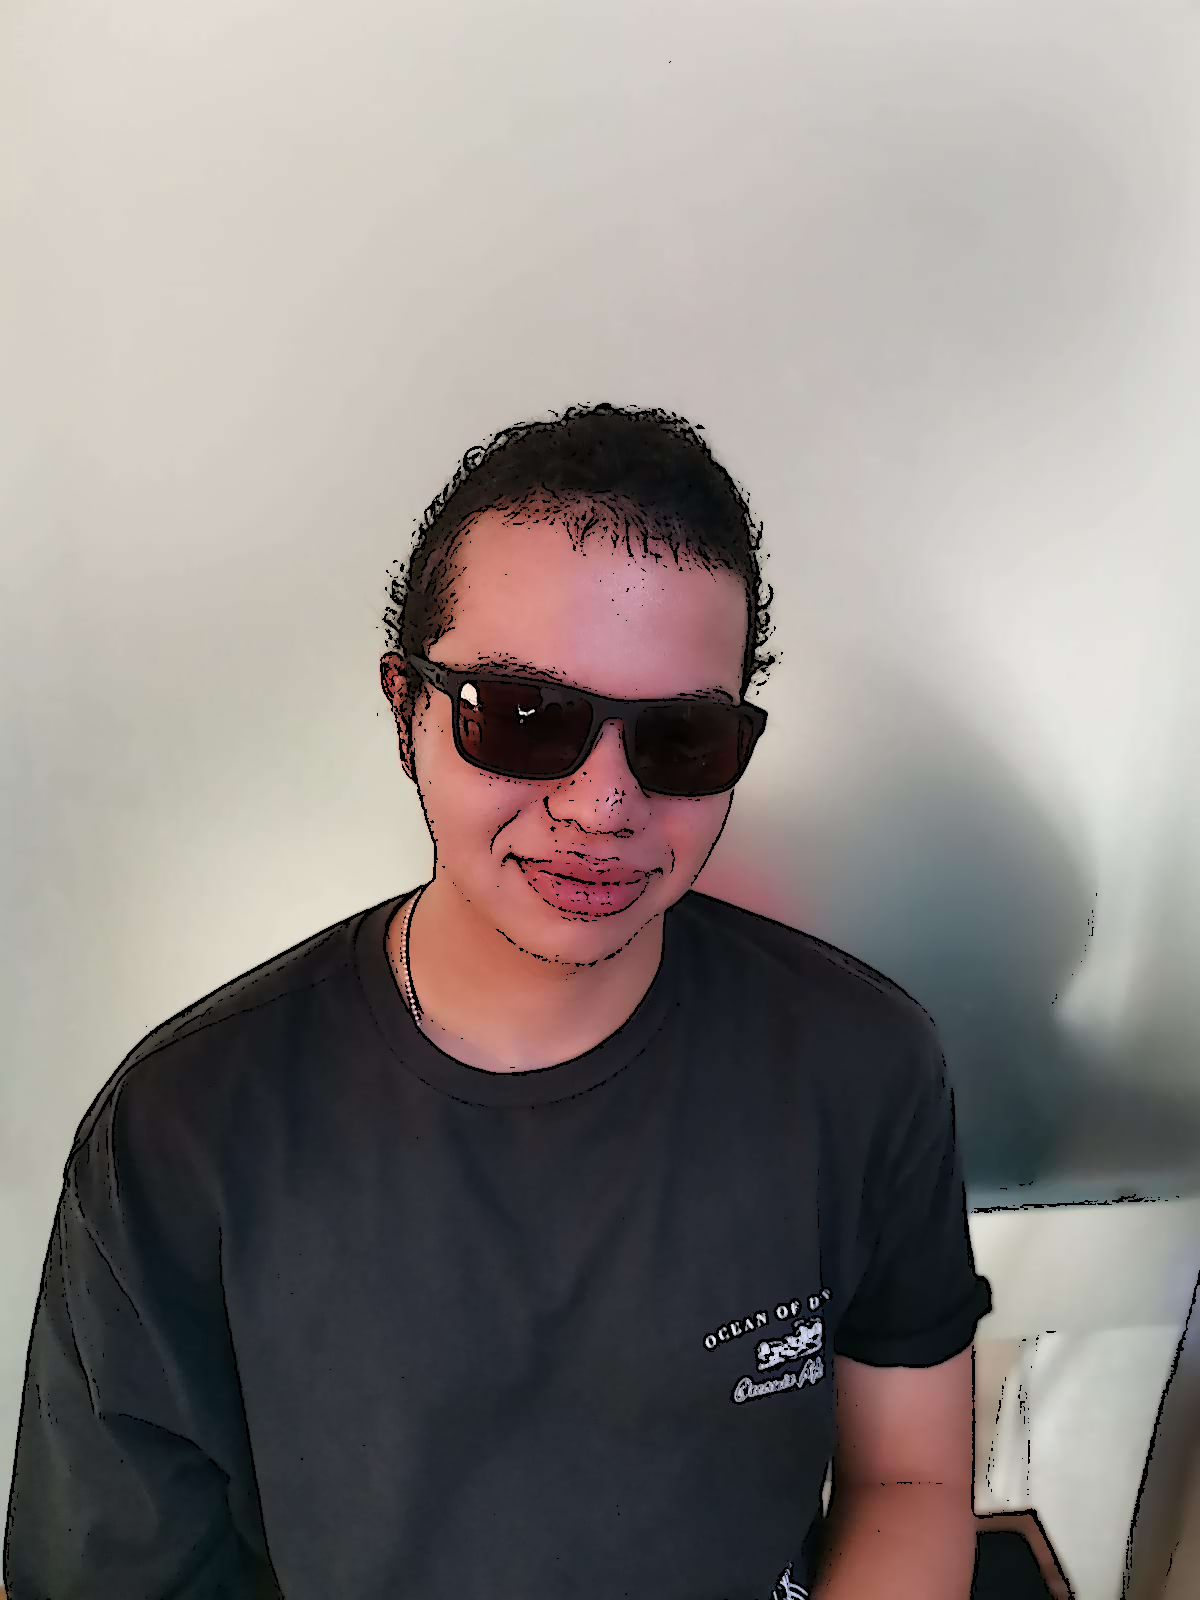

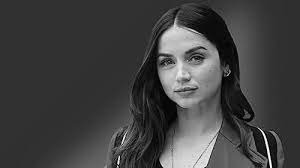

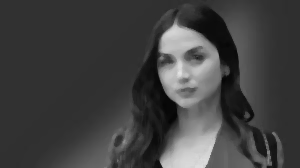

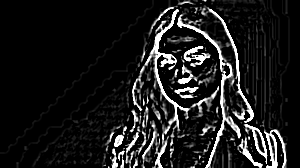

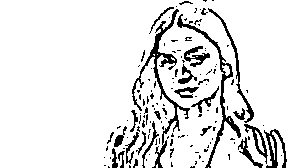

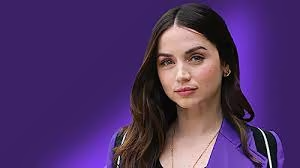

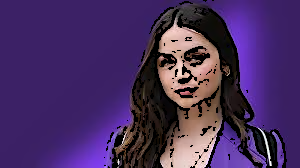

In [ ]:
def process_images(image_paths):
    for i, image_path in enumerate(image_paths):
        # Load the input image from the specified file path using OpenCV.
        input_image = cv2.imread(image_path)

        # Convert the input image to grayscale.
        grayscale_image = convert_to_grayscale(input_image)

        # Reduce noise in the grayscale image.
        noise_reduced_image = reduce_noise(grayscale_image)

        # Apply Laplacian filter for edge detection.
        laplacian = laplacian_filter(noise_reduced_image)

        # Perform edge detection.
        edge_mask = edge_detection(laplacian)

        # Apply bilateral filtering for cartoonization.
        bilateral_image = bilateral_filter(input_image)

        # Cartoonize the image.
        cartoonized_image = cartoonize_image(bilateral_image, edge_mask)


# Example usage:
image_paths = ["/content/test 2.png","/content/test 3.jpg","/content/ana de rmas.jpg"]
process_images(image_paths)



# 2 PartII: Road Lane Detection Using Hough **Transform**

### 2.1 Hough Transform

##### 2.2.1 Smoothing the image

In [ ]:
!gdown 1DRGNwqzznfYV8fObM3FxQBIa9Yd5y8iD -O assignment_road_sample.jpg

Downloading...
From: https://drive.google.com/uc?id=1DRGNwqzznfYV8fObM3FxQBIa9Yd5y8iD
To: /content/assignment_road_sample.jpg
100% 247k/247k [00:00<00:00, 113MB/s]


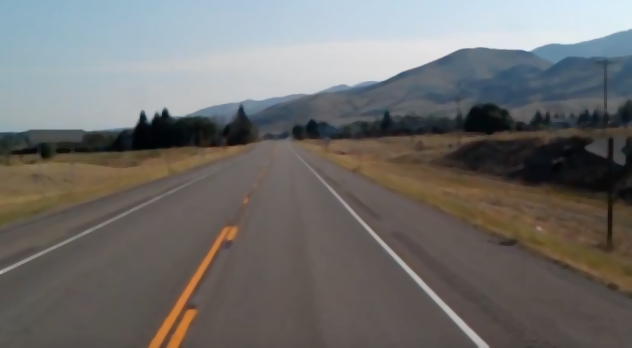

In [ ]:
import cv2
from IPython.display import Image, display
import numpy as np

# Step 1: Preprocess the Image
input_image = cv2.imread("assignment_road_sample.jpg")
noise_reduced_image = cv2.medianBlur(input_image, 5)

saveShowImg(noise_reduced_image, "noise_reduced_road.png")

##### 2.2.2 Edge Detection

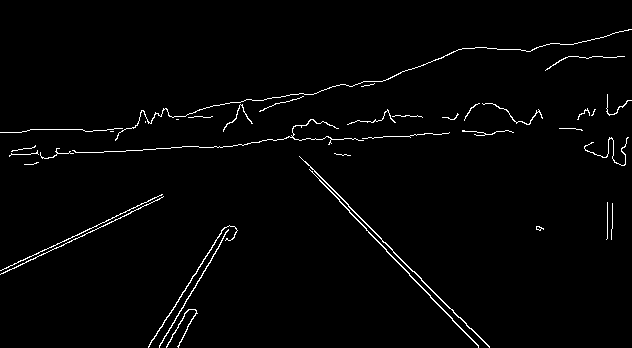

In [ ]:
# Step 2: Edge Detection using Canny
low_threshold = 100  # can be adjusted best I find 100-150
high_threshold = 200  # can be adjusted best I find 200-250
edges = cv2.Canny(noise_reduced_image, low_threshold, high_threshold)

saveShowImg(edges, "edge_detected_road.png")

In [ ]:
edges.shape

(348, 632)

In [ ]:
np.unique(edges)

array([  0, 255], dtype=uint8)

### 2.3 Region Of Interest

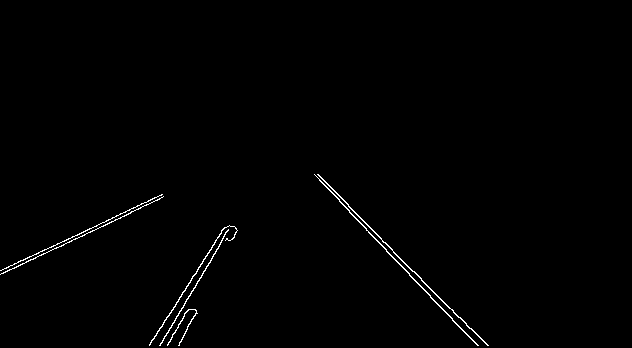

In [ ]:
height, width = edges.shape
roi_vertices = np.array([[(0, height * 0.9925), (0, height // 2), (width * 0.8, height // 2), [width * 0.8, height * 0.9925]]], dtype=np.int32)
mask = np.zeros_like(edges)
cv2.fillPoly(mask, roi_vertices, 255)
masked_edges = cv2.bitwise_and(edges, mask)
saveShowImg(masked_edges, "masked_edges_road.png")

##### 2.3.1 Accumulation into (ρ, θ)-space using Hough transform

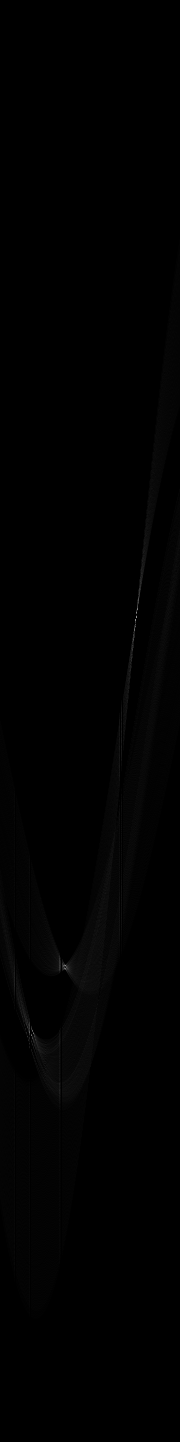

In [ ]:
# Step 4: Accumulate (ρ, θ) values using the Hough Transform
rho_resolution = 1
max_rho = int(np.sqrt(height**2 + width**2))
theta_resolution = np.deg2rad(1)
accumulator = np.zeros((int(2 * max_rho / rho_resolution), int(np.pi / theta_resolution)))
for y in range(height):
    for x in range(width):
        if masked_edges[y, x] > 0:
            for theta in np.arange(0, np.pi, theta_resolution):
                rho = x * np.cos(theta) + y * np.sin(theta)
                accumulator[int((rho + max_rho) / rho_resolution), int(theta / theta_resolution)] += 1
saveShowImg(accumulator, "accumulator_image.png")

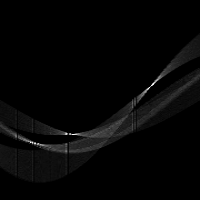

In [ ]:
accumulator_resized_image = cv2.resize(accumulator, (200, 200))
accumulator_resized_image = cv2.convertScaleAbs(accumulator_resized_image, alpha=5, beta=0)
saveShowImg(accumulator_resized_image, "roadLane_accumulator_image.png")

In [ ]:
np.unique(accumulator)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        69.,  72.,  74.,  75.,  76.,  77.,  80.,  81.,  82.,  84.,  86.,
        89.,  93.,  98., 100., 102., 105., 107., 109., 111., 115., 130.,
       135., 139., 140., 151.])

##### 2.3.2 Refining Coordinates and HT Post-Processing

In [ ]:
threshold = 50
neighborhood_size = 9
rho_indices, theta_indices = np.where(accumulator > threshold)
def peak_detection(accumulator, threshold, neighborhood_size):
  peaks = []
  for rho_index, theta_index in zip(rho_indices, theta_indices):
    rho = (rho_index * rho_resolution) - max_rho
    theta = theta_index * theta_resolution
    vote = accumulator[rho_index, theta_index]
    max_in_neighborhood = np.max(accumulator[
        max(0, rho_index - neighborhood_size): min(accumulator.shape[0], rho_index + neighborhood_size + 1),
        max(0, theta_index - neighborhood_size): min(accumulator.shape[1], theta_index + neighborhood_size + 1)
    ])
    if vote == max_in_neighborhood:
        peaks.append((rho, theta))
  return peaks
peaks = peak_detection(accumulator, threshold, neighborhood_size)

### 2.4 Draw the detected road lanes on the image

In [ ]:
def get_x1_y1(x0, y0, a, height=632):
  line_length = 1000
  if int(y0 + line_length * (a)) > height:
    while int(y0 + line_length * (a)) > height:
      line_length -= 1
    return int(x0 + line_length * (-b)), int(y0 + line_length * (a))
  else:
    # print(f"else {int(y0 - line_length * (a))}")
    while int(y0 - line_length * (a)) > height:
      line_length -= 1
    return int(x0 - line_length * (-b)), int(y0 - line_length * (a))

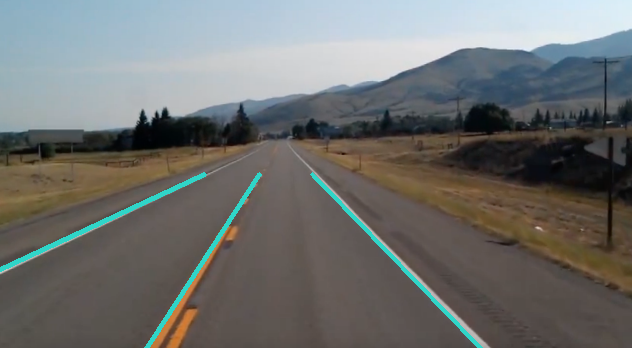

In [ ]:
image_height = input_image.shape[0]
image_with_lines = np.copy(input_image)
for rho, theta in peaks:
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  x1, y1 = get_x1_y1(x0, y0, a)
  y2 = image_height // 2
  x2 = int(((y2 - y0) * (x0 - x1) / (y0 - y1)) + x0)
  cv2.line(image_with_lines, (x1, y1), (x2, y2), (200, 213, 48), 3)

saveShowImg(image_with_lines, "roadLane_with_lanes_lines.png")